In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
# import csv


In [ ]:
data = pd.read_csv("APA-DDoS-Dataset.csv")
data.head

In [3]:
columns=data.columns
print(columns)

Index(['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto',
       'frame.len', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.df', 'ip.flags.rb', 'tcp.seq',
       'tcp.ack', 'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')


In [32]:
print(data["Label"].value_counts())

Benign          75600
DDoS-PSH-ACK    37800
DDoS-ACK        37800
Name: Label, dtype: int64


In [ ]:
columns=data.columns
for field in columns:
    print(data[field].value_counts())

In [8]:
dataplt=data.drop(columns=["tcp.dstport","ip.proto","tcp.flags.syn","tcp.flags.reset","tcp.flags.ack","ip.flags.mf","ip.flags.rb","tcp.seq","tcp.ack"])
"""

Dropping these columns for various reasons
1. all columns have same value throught tha database so they are useless as they do not effect the Label.(Proved in above cell)

"""
# Converting time to Float so that we can do pairplot
time_int=[]

for time in dataplt["frame.time"]:
    # print(time[13:30],float(time[13:15])*3600 + float(time[16:18])*60+float(time[19:30]))
    time_int.append(float(time[13:15])*3600 + float(time[16:18])*60+float(time[19:24]))

dataplt["frame.time"]=time_int

dataplt.replace(dataplt["ip"])

#Providing unique Integer ID to each IP

dataplt.replace(dataplt["ip.src"],[i for i in range(len(set(dataplt["ip.src"].)))])


    




In [ ]:
#Checking that only relevant columns are included which have distinguished integer values
for field in dataplt.columns:
    print(dataplt[field].value_counts())

In [9]:
dataplt.head
#taking this to reduce time complexity since dataset is very big you can change this value to plot more points
dataplt=dataplt.sample(frac=0.001)

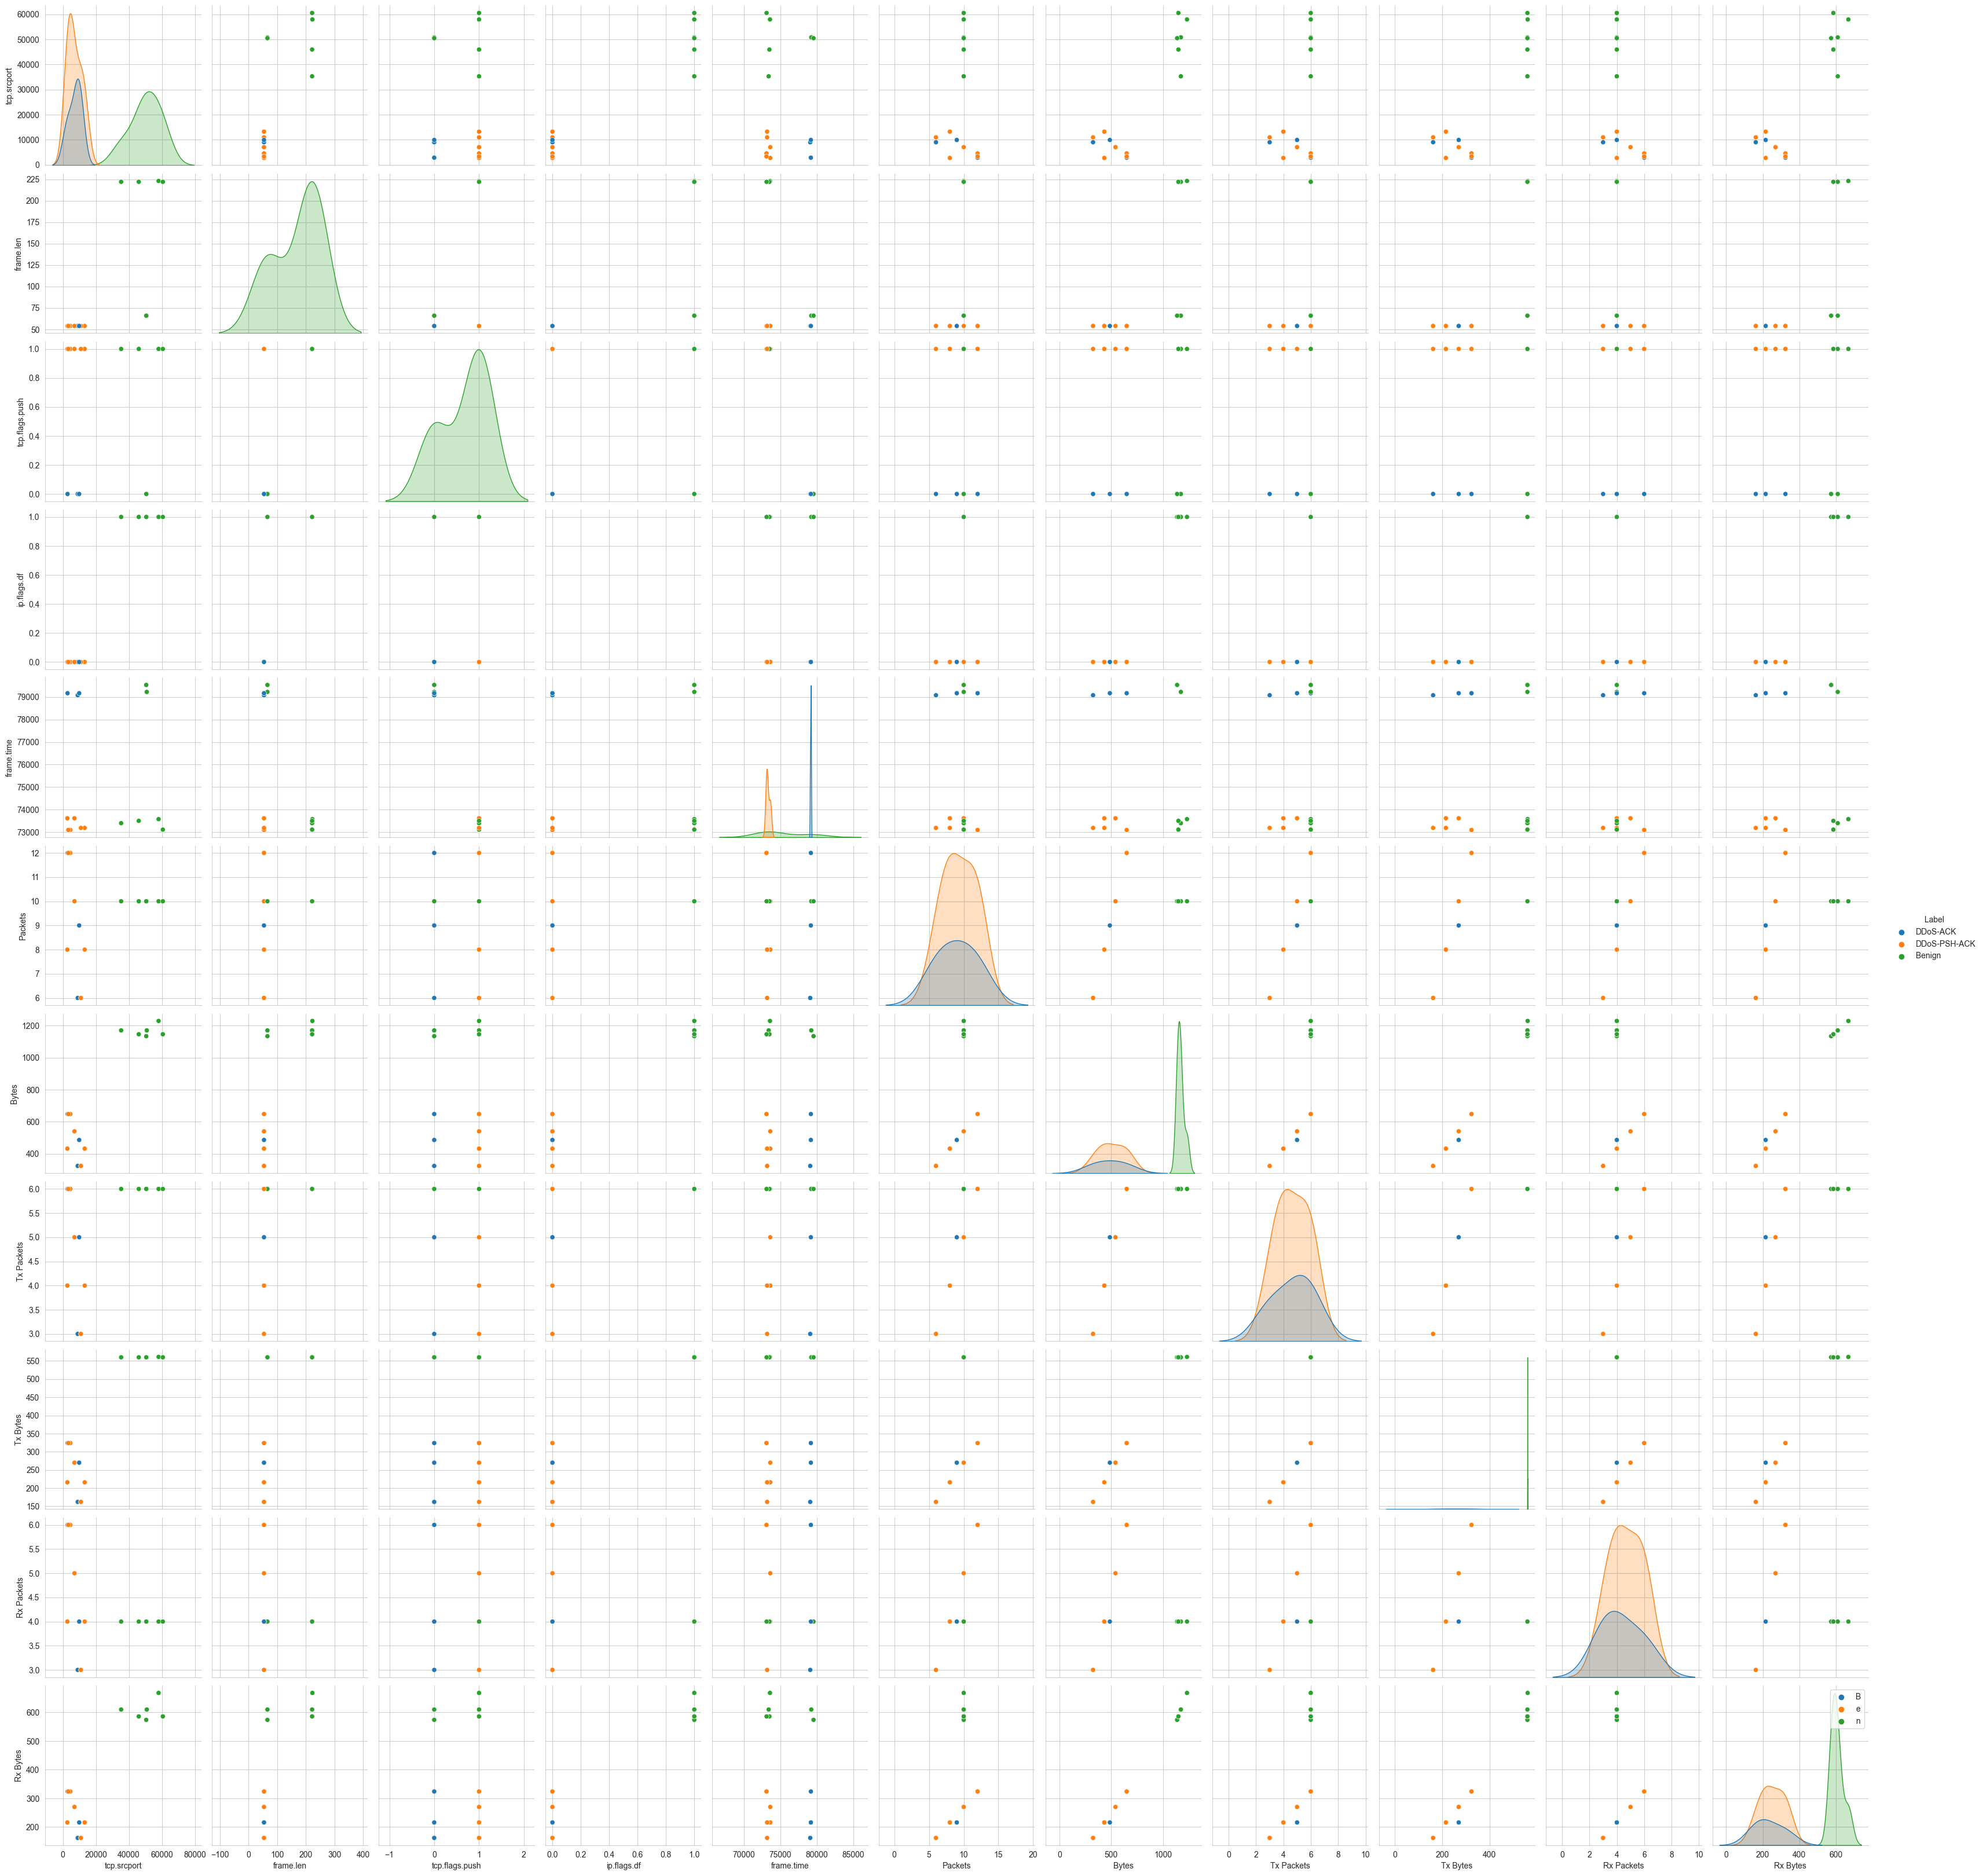

In [13]:
# Pairplot with less time complexity and bad visibility.
sns.set_style("whitegrid");

ppt =sns.pairplot(dataplt, hue="Label", height=3);
handles = ppt._legend_data.values()
labels = dataplt["Label"].unique()
legend = plt.legend(handles=handles, labels=labels.all(), loc="upper right")
plt.show()

## Bytes

### Bytes vs Packets, Rx Bytes, Rx Packets, Tx Bytes, Tx Packets

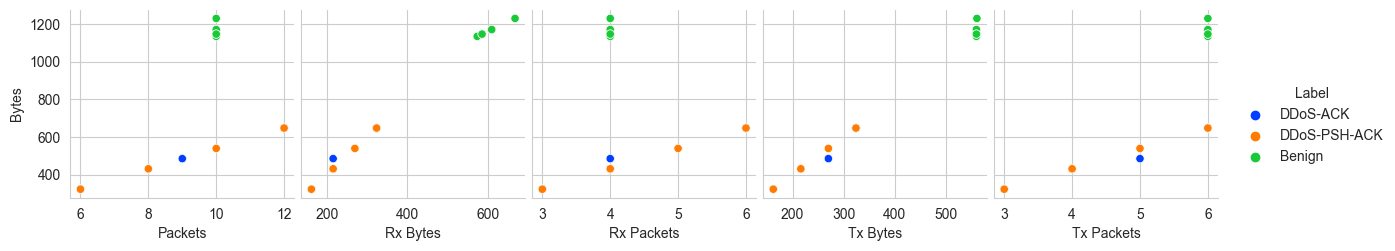

### Bytes vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

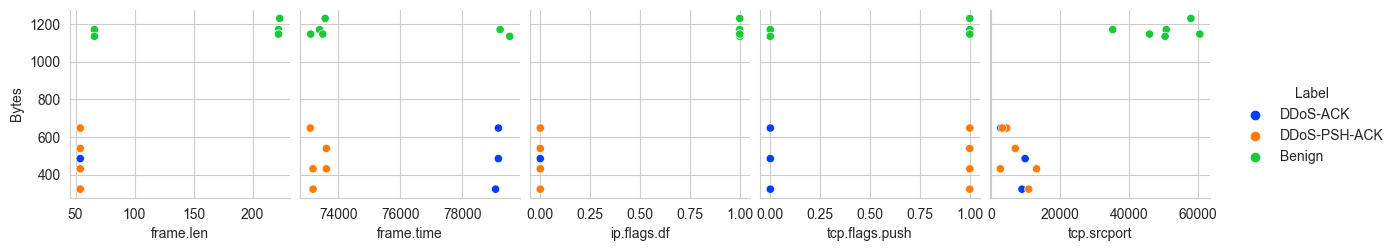

## Packets

### Packets vs Bytes, Rx Bytes, Rx Packets, Tx Bytes, Tx Packets

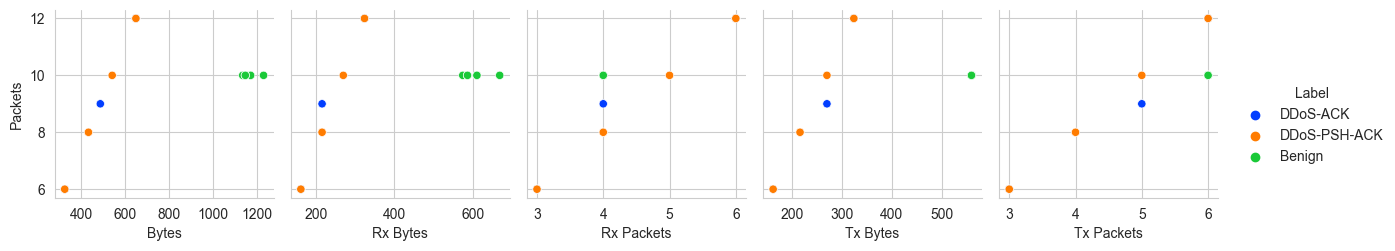

### Packets vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

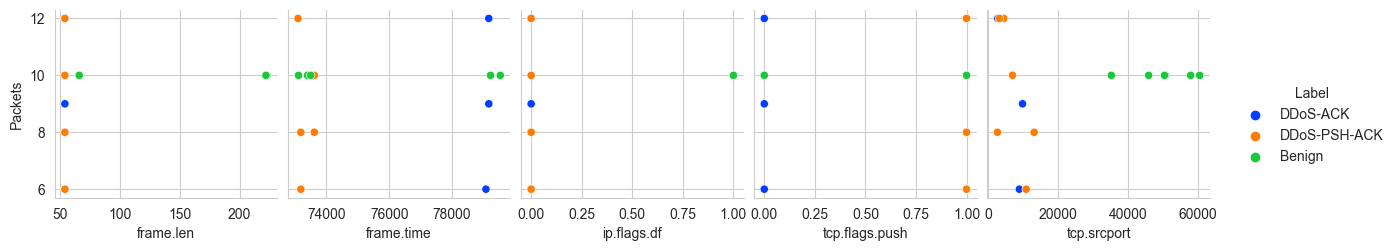

## Rx Bytes

### Rx Bytes vs Bytes, Packets, Rx Packets, Tx Bytes, Tx Packets

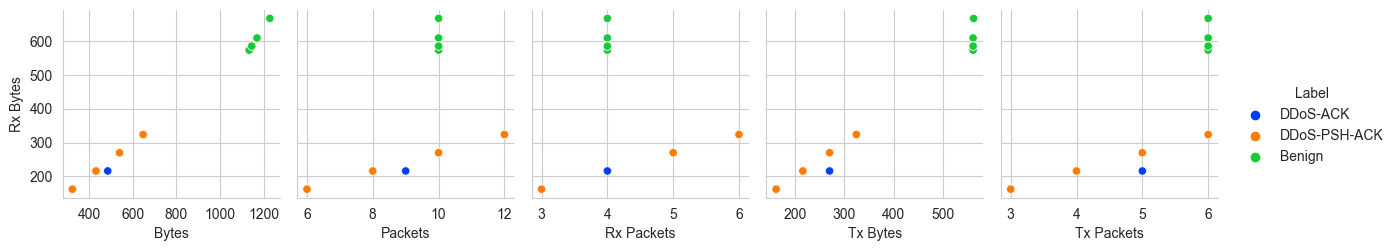

### Rx Bytes vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

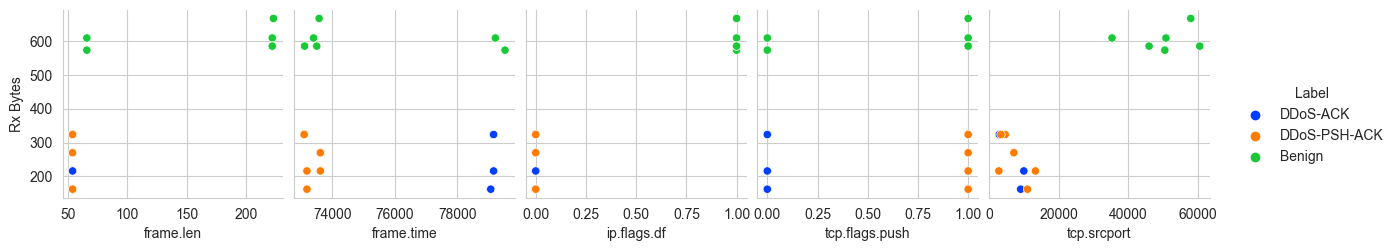

## Rx Packets

### Rx Packets vs Bytes, Packets, Rx Bytes, Tx Bytes, Tx Packets

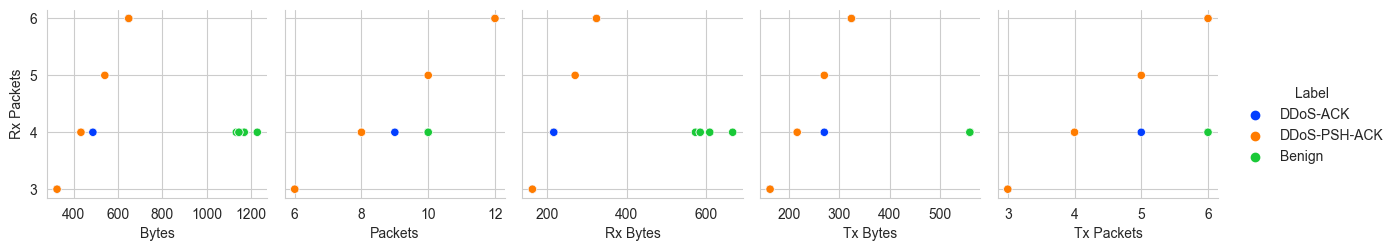

### Rx Packets vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

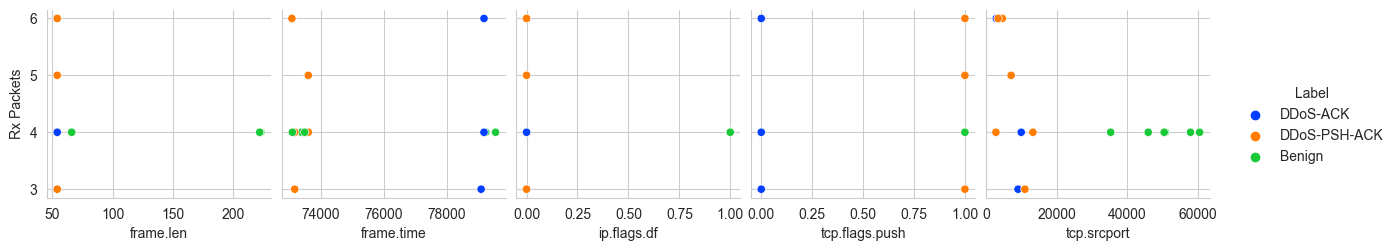

## Tx Bytes

### Tx Bytes vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Packets

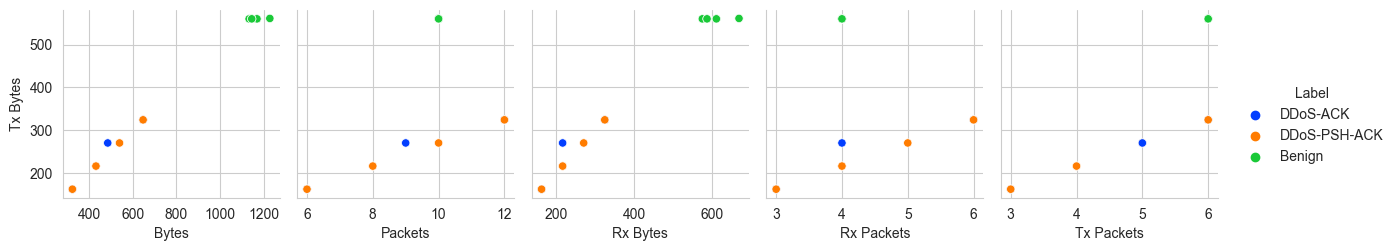

### Tx Bytes vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

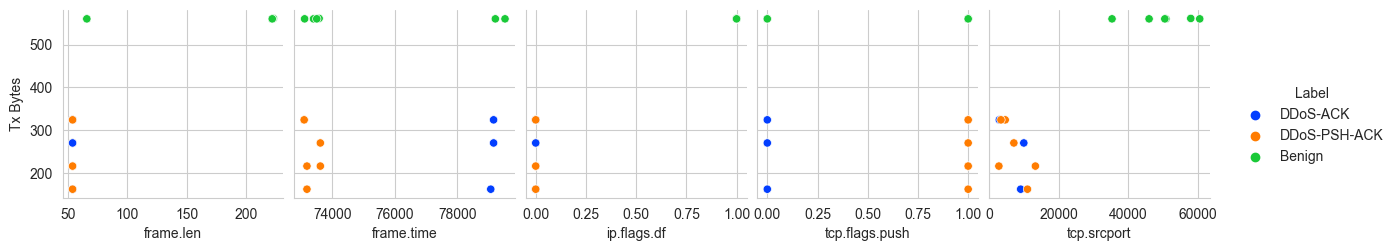

## Tx Packets

### Tx Packets vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

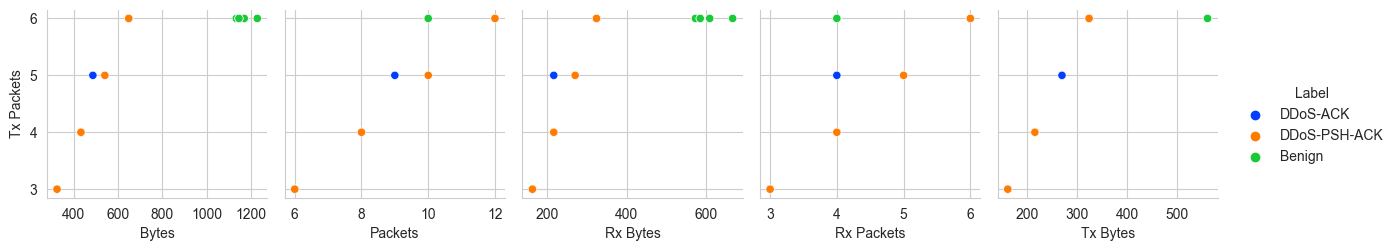

### Tx Packets vs frame.len, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

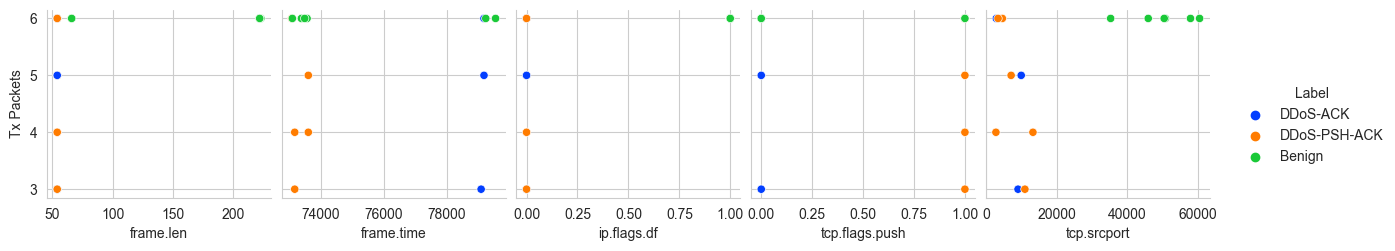

## frame.len

### frame.len vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

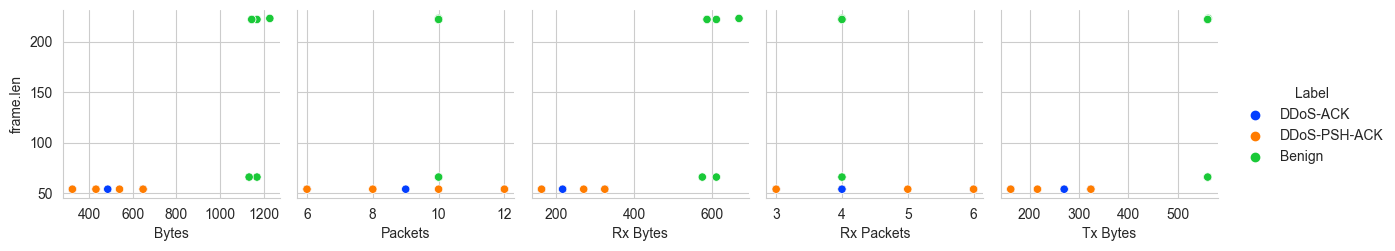

### frame.len vs Tx Packets, frame.time, ip.flags.df, tcp.flags.push, tcp.srcport

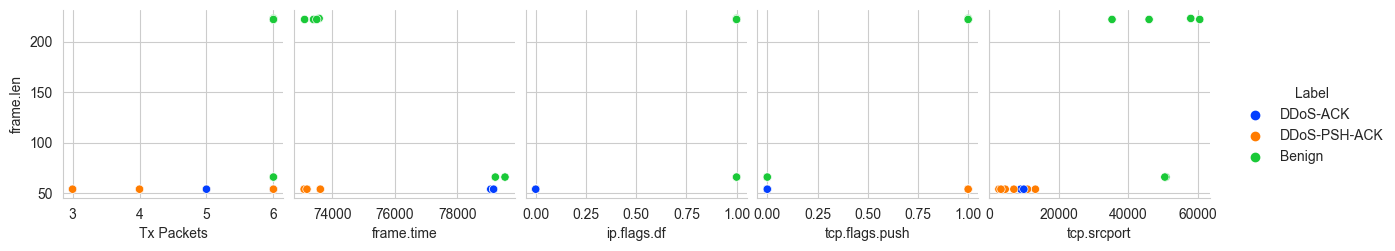

## frame.time

### frame.time vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

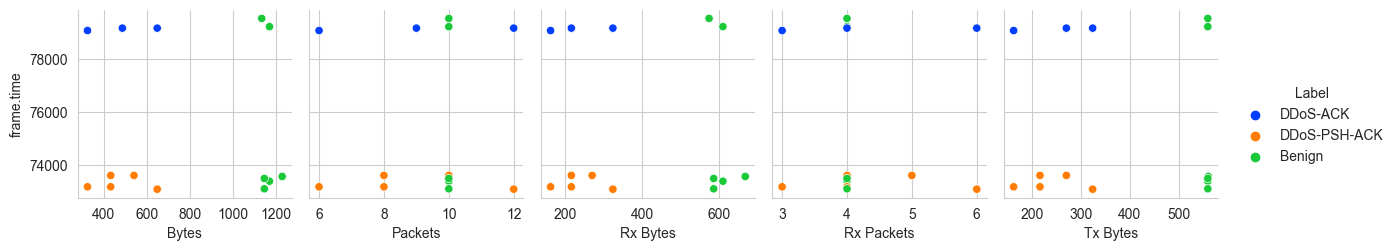

### frame.time vs Tx Packets, frame.len, ip.flags.df, tcp.flags.push, tcp.srcport

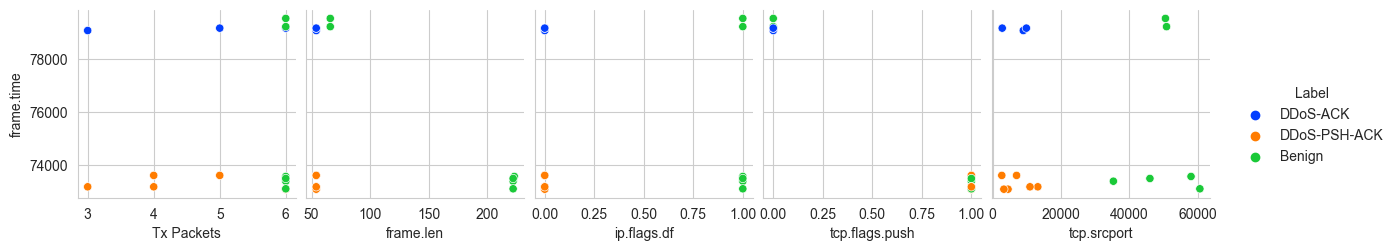

## ip.flags.df

### ip.flags.df vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

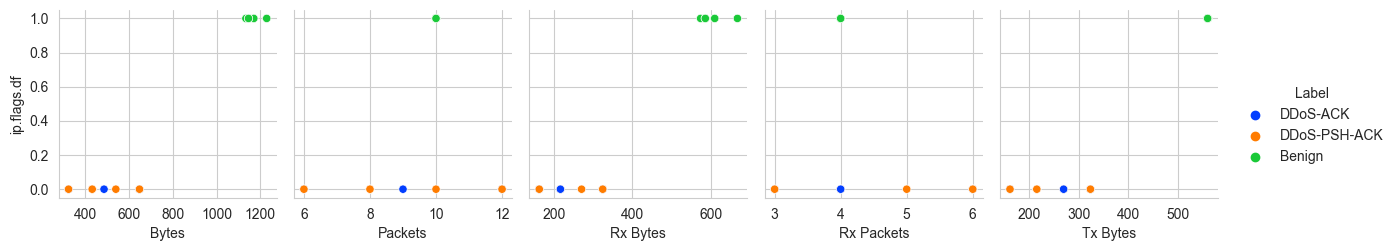

### ip.flags.df vs Tx Packets, frame.len, frame.time, tcp.flags.push, tcp.srcport

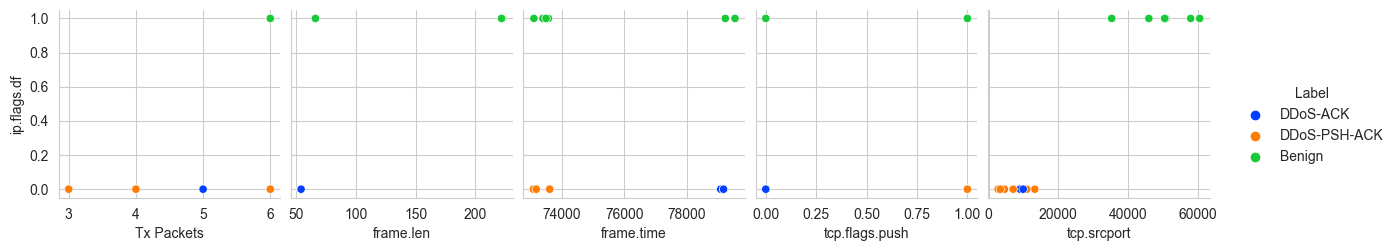

## tcp.flags.push

### tcp.flags.push vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

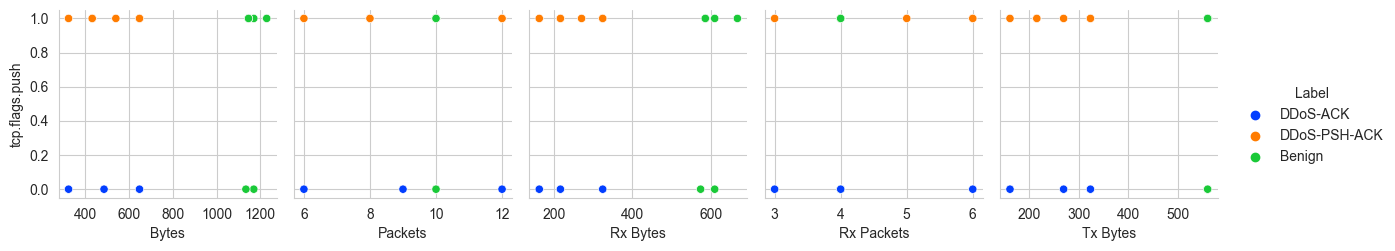

### tcp.flags.push vs Tx Packets, frame.len, frame.time, ip.flags.df, tcp.srcport

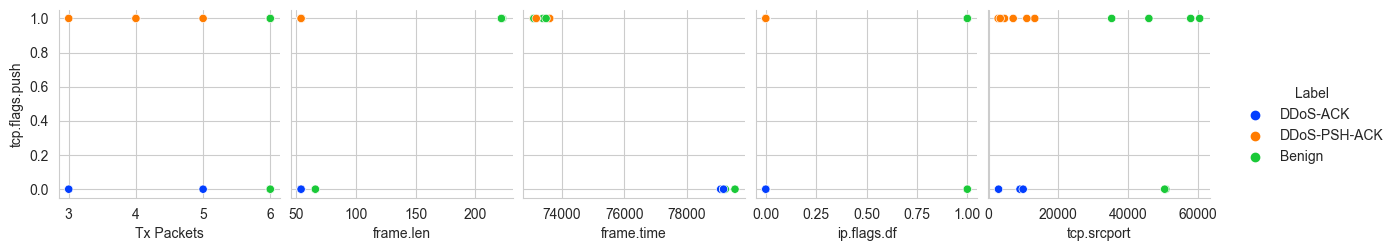

## tcp.srcport

### tcp.srcport vs Bytes, Packets, Rx Bytes, Rx Packets, Tx Bytes

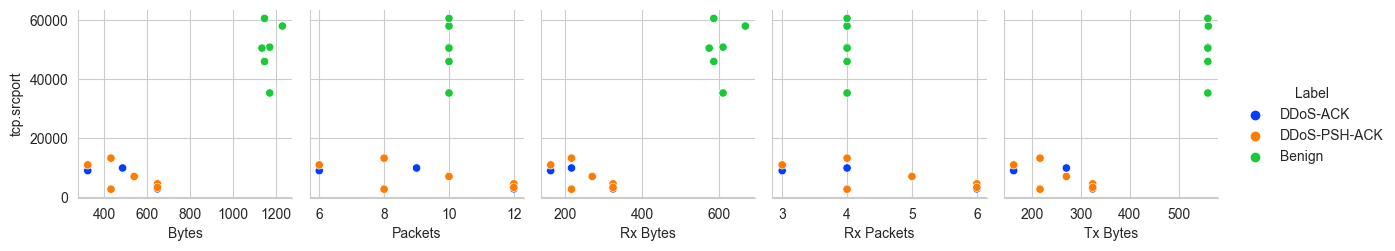

### tcp.srcport vs Tx Packets, frame.len, frame.time, ip.flags.df, tcp.flags.push

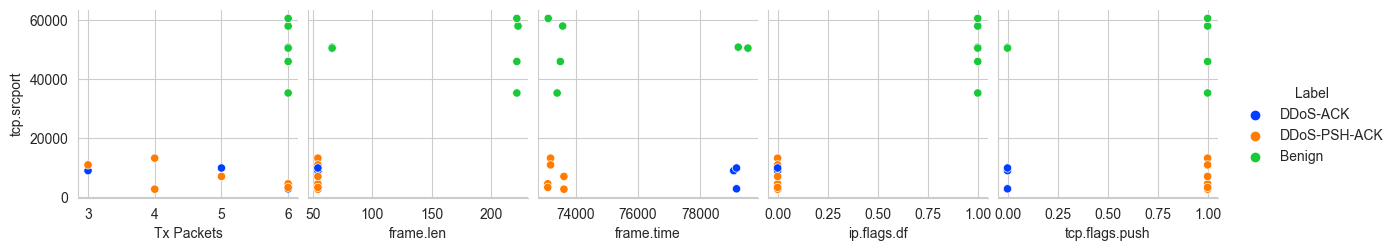

In [12]:
#Pairplot with high time-complexity and better visibility
hue = 'Label'
vars_per_line = 5
all_vars = list(dataplt.columns.symmetric_difference([hue]))

for var in all_vars:
    rest_vars = list(all_vars)
    rest_vars.remove(var)
    display(Markdown(f"## {var}"))
    while rest_vars:
        line_vars = rest_vars[:vars_per_line]
        del rest_vars[:vars_per_line]
        line_var_names = ", ".join(line_vars)
        display(Markdown(f"### {var} vs {line_var_names}"))
        sns.pairplot(dataplt, x_vars=line_vars, y_vars=[var], hue=hue, palette='bright', )
        plt.show()
        plt.close()

1. We can Clearly see that all features are useful and we can get a useful decision boundary in all the plots. And can distinguish between the classes

2. Also Benign Class seems to be an outlier

{'Benign', 'DDoS-ACK', 'DDoS-PSH-ACK'}